<a href="https://colab.research.google.com/github/owaru2000-cyber/dataAnalysis/blob/main/FIFAData(%ED%95%99%EC%83%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 - FIFA data를 이용한 스포츠분석

## 분석 모듈 불러오기

In [ ]:
import pandas as pd                # 표 형태의 데이터를 다루기 위한 라이브러리
import matplotlib.pyplot as plt    # 가장 기본적인 그래프 그리기 도구
import seaborn as sns              # matplotlib 기반 고급 시각화 라이브러리
import numpy as np                 # 수학 및 배열 계산을 위한 라이브러리
import plotly.express as px        # 인터랙티브(상호작용형) 그래프를 그릴 수 있는 도구 # 확대 회전 마우스 오버 가능한 시각화
!pip install koreanize-matplotlib  # 그래프에서 한글이 잘 나오게 하는 라이브러리
import koreanize_matplotlib

## FIFA22 선수 데이터 불러오기


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/2025data/players_22.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


/tmp/ipython-input-4194167550.py:1: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## 필요한 데이터만 불러오기

In [ ]:
data1 = data[['short_name','player_positions','overall','potential','value_eur','wage_eur','age','height_cm','weight_kg',
              'club_name','nationality_name','preferred_foot','international_reputation', 'skill_moves','weak_foot','work_rate']]
data1.head()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,nationality_name,preferred_foot,international_reputation,skill_moves,weak_foot,work_rate
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,Argentina,Left,5,4,4,Medium/Low
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,Poland,Right,5,4,4,High/Medium
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,Portugal,Right,5,5,4,High/Low
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,Brazil,Right,5,5,5,High/Medium
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,Belgium,Right,4,4,5,High/High


## column 명 변경

In [ ]:
new_data = data1.rename(columns={'short_name' : '이름', 'player_positions' : '포지션', 'overall' : '전반적수치', 'potential' : '잠재적수치',
                                 'value_eur' : '선수가치', 'wage_eur' : '임금(주급)', 'age' : '나이', 'height_cm':'키', 'weight_kg':'몸무게',
                                 'club_name' : '소속클럽이름', 'nationality_name' : '소속국가', 'preferred_foot' : '주요사용발',
                                 'international_reputation': '국제적 명성', 'skill_moves' : '기술동작능력',
                                 'weak_foot' : '약발 숙련도', 'work_rate' : '활동량 수준'})
new_data.head()

,이름,포지션,전반적수치,잠재적수치,선수가치,임금(주급),나이,키,몸무게,소속클럽이름,소속국가,주요사용발,국제적 명성,기술동작능력,약발 숙련도,활동량 수준
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,Argentina,Left,5,4,4,Medium/Low
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,Poland,Right,5,4,4,High/Medium
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,Portugal,Right,5,5,4,High/Low
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,Brazil,Right,5,5,5,High/Medium
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,Belgium,Right,4,4,5,High/High


## 결측치 확인과 제거

In [ ]:
new_data.isnull().sum()      # 결측치 확인

,0
이름,0
포지션,0
전반적수치,0
잠재적수치,0
선수가치,74
임금(주급),61
나이,0
키,0
몸무게,0
소속클럽이름,61


In [ ]:
new_data = new_data.dropna()      # 결측치 제거


In [ ]:
new_data.isnull().sum()           # 결측치 확인

,0
이름,0
포지션,0
전반적수치,0
잠재적수치,0
선수가치,0
임금(주급),0
나이,0
키,0
몸무게,0
소속클럽이름,0


## 포지션별 전반적 수치 분석

/tmp/ipython-input-347196710.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-347196710.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-347196710.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




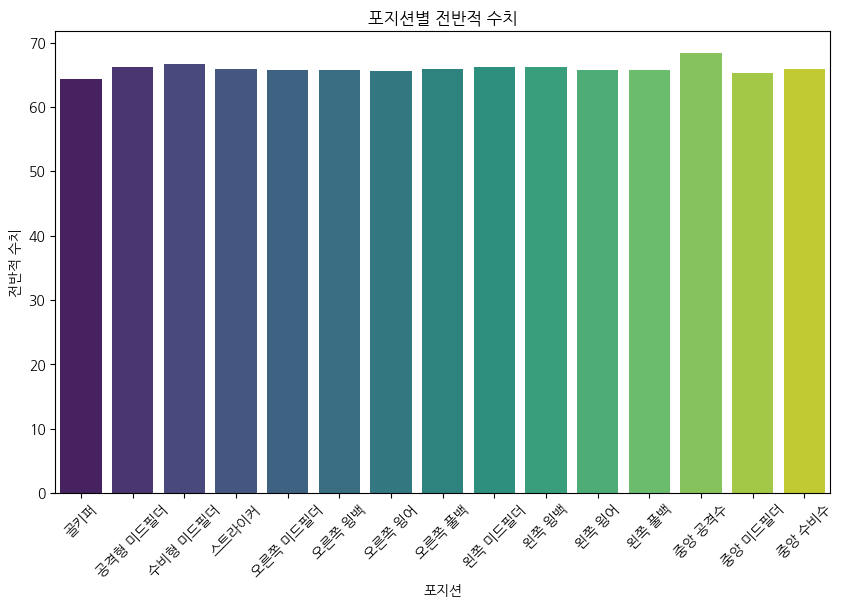

In [ ]:
new_data['주요포지션']= new_data['포지션'].str.split(',').str[0]
position_kor={'GK': '골키퍼',
    'CB': '중앙 수비수',
    'LB': '왼쪽 풀백',
    'RB': '오른쪽 풀백',
    'LWB': '왼쪽 윙백',
    'RWB': '오른쪽 윙백',
    'CDM': '수비형 미드필더',
    'CM': '중앙 미드필더',
    'CAM': '공격형 미드필더',
    'LM': '왼쪽 미드필더',
    'RM': '오른쪽 미드필더',
    'LW': '왼쪽 윙어',
    'RW': '오른쪽 윙어',
    'CF': '중앙 공격수',
    'ST': '스트라이커'}
new_data['주요포지션_한글'] = new_data['주요포지션'].map(position_kor)
position_overall = new_data.groupby('주요포지션_한글')['전반적수치'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x= position_overall.index, y=position_overall.values, palette='viridis')

plt.title('포지션별 전반적 수치')
plt.xlabel('포지션')
plt.xticks(rotation=45)
plt.ylabel('전반적 수치')
plt.show()

/tmp/ipython-input-3399743691.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




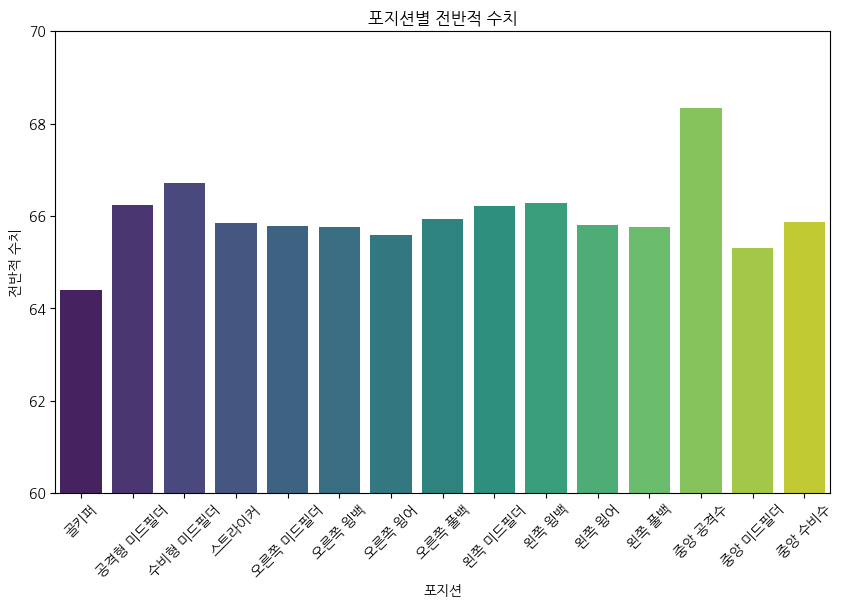

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x= position_overall.index, y=position_overall.values, palette='viridis')

plt.title('포지션별 전반적 수치')
plt.xlabel('포지션')
plt.xticks(rotation=45)
plt.ylabel('전반적 수치')
plt.ylim(60,70)
plt.show()

## 포지션 별 평균 연봉

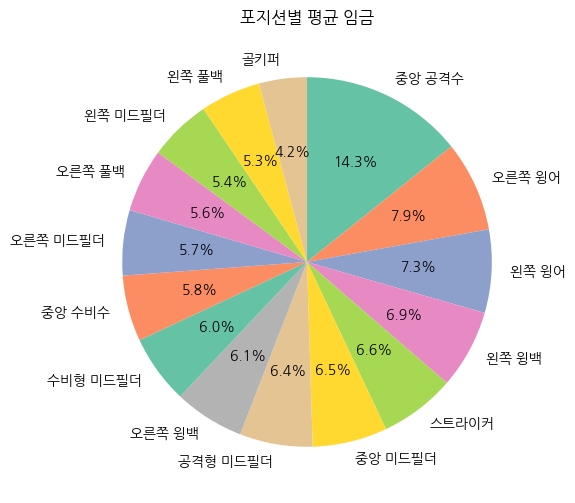

In [ ]:
new_data['주요포지션'] = new_data['포지션'].str.split(',').str[0]
position_kor={'GK': '골키퍼',
    'CB': '중앙 수비수',
    'LB': '왼쪽 풀백',
    'RB': '오른쪽 풀백',
    'LWB': '왼쪽 윙백',
    'RWB': '오른쪽 윙백',
    'CDM': '수비형 미드필더',
    'CM': '중앙 미드필더',
    'CAM': '공격형 미드필더',
    'LM': '왼쪽 미드필더',
    'RM': '오른쪽 미드필더',
    'LW': '왼쪽 윙어',
    'RW': '오른쪽 윙어',
    'CF': '중앙 공격수',
    'ST': '스트라이커'}
new_data['주요포지션_한글'] = new_data['주요포지션'].map(position_kor)
position_wage = new_data.groupby('주요포지션_한글')['임금(주급)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
colors = sns.color_palette('Set2')
plt.pie(position_wage, labels=position_wage.index, startangle=90,
        autopct='%1.1f%%',colors=colors, counterclock=False)
plt.title('포지션별 평균 임금')
plt.show()

## 중앙 공격수들이 많이 사용하는 발은?

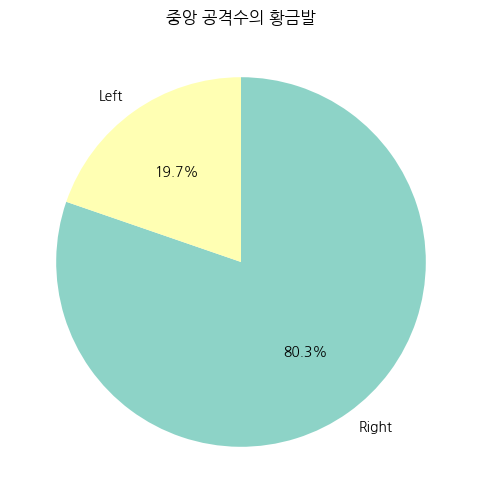

In [ ]:
cf_players = new_data[new_data['주요포지션_한글'] =='중앙 공격수']
cf_foot = cf_players['주요사용발'].value_counts()

plt.figure(figsize=(10,6))
colors = sns.color_palette('Set3')
plt.pie(cf_foot, labels=cf_foot.index, startangle=90,
        autopct='%1.1f%%',colors=colors, counterclock=False)
plt.title('중앙 공격수의 황금발')
plt.show()

## 선수들의 키와 몸무게, 나이의 분포

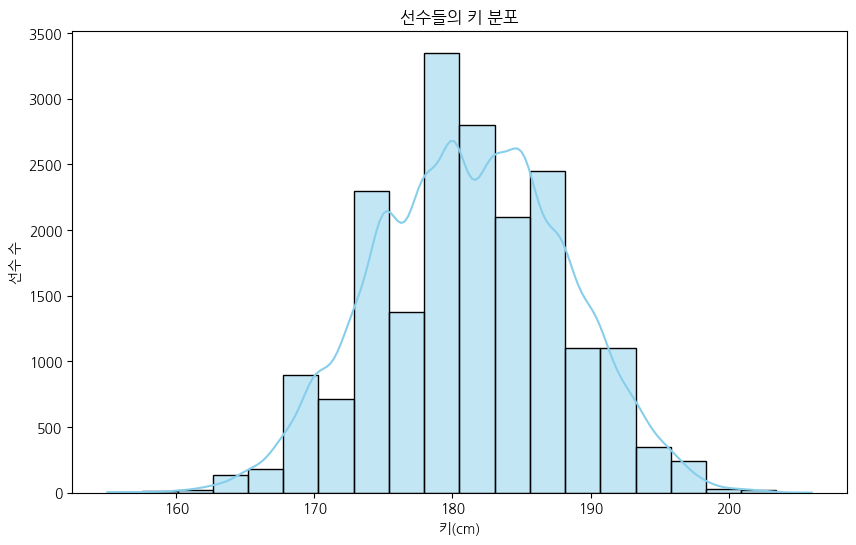

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['키'], bins=20, kde=True, color='skyblue')
plt.title('선수들의 키 분포')
plt.xlabel('키(cm)')
plt.ylabel('선수 수')
plt.show()

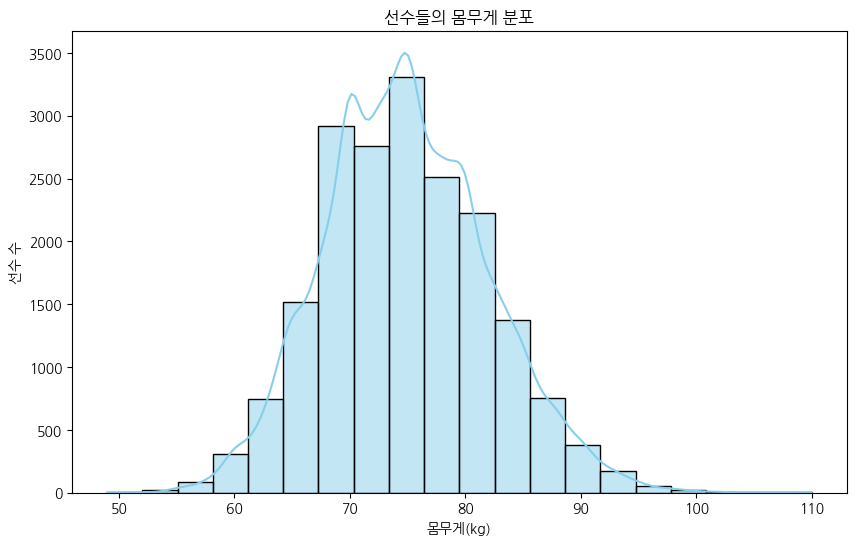

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['몸무게'], bins=20, kde=True, color='skyblue')
plt.title('선수들의 몸무게 분포')
plt.xlabel('몸무게(kg)')
plt.ylabel('선수 수')
plt.show()

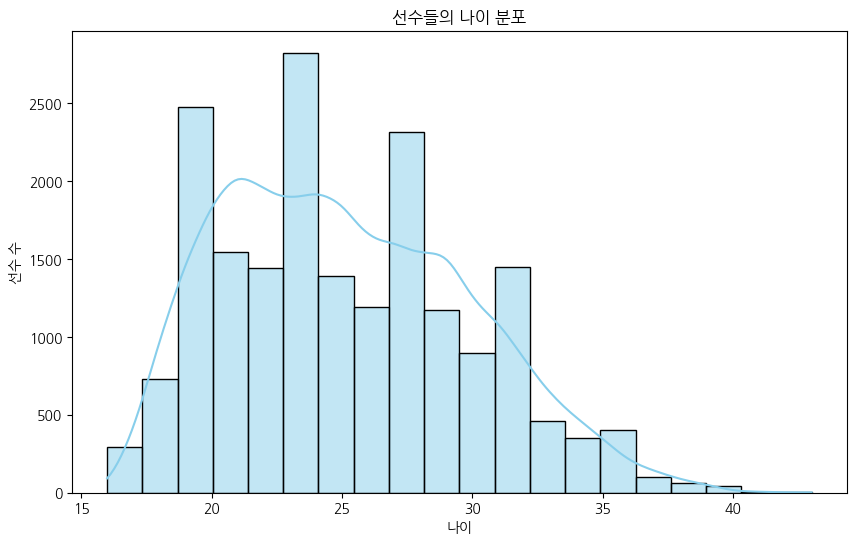

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['나이'], bins=20, kde=True, color='skyblue')
plt.title('선수들의 나이 분포')
plt.xlabel('나이')
plt.ylabel('선수 수')
plt.show()

## 선수의 가치는 어떤것들이 결정하는가?


In [ ]:
new_data.head()

,이름,포지션,전반적수치,잠재적수치,선수가치,임금(주급),나이,키,몸무게,소속클럽이름,소속국가,주요사용발,국제적 명성,기술동작능력,약발 숙련도,활동량 수준,주요포지션,주요포지션_한글
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,Argentina,Left,5,4,4,Medium/Low,RW,오른쪽 윙어
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,Poland,Right,5,4,4,High/Medium,ST,스트라이커
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,Portugal,Right,5,5,4,High/Low,ST,스트라이커
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,Brazil,Right,5,5,5,High/Medium,LW,왼쪽 윙어
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,Belgium,Right,4,4,5,High/High,CM,중앙 미드필더


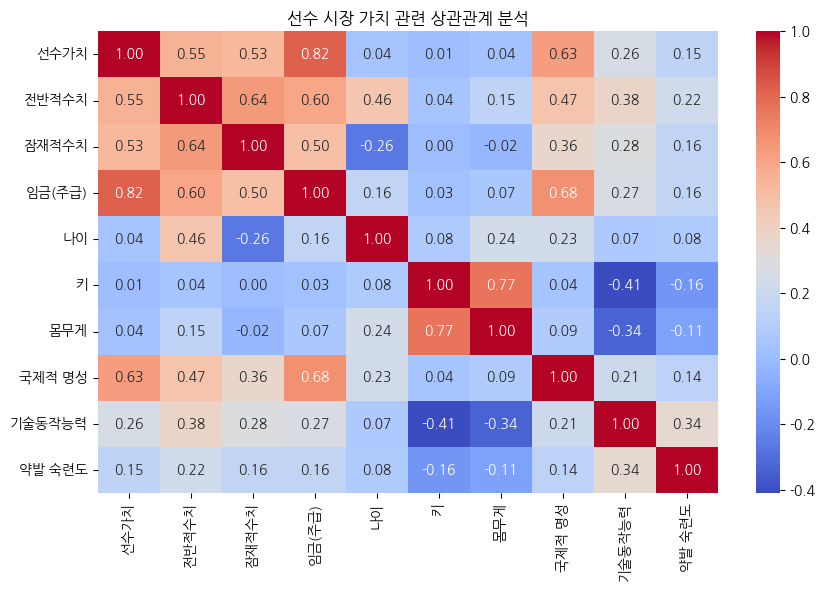

In [ ]:
new_codata = ['선수가치','전반적수치','잠재적수치','임금(주급)',
              '나이','키','몸무게','국제적 명성','기술동작능력','약발 숙련도']

corr_matrix = new_data[new_codata].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('선수 시장 가치 관련 상관관계 분석')
plt.show()

## 선수가치와 임금(주급)간의 상관관계를 시각화

In [ ]:
fig=px.scatter(new_data, x='선수가치', y='임금(주급)', size='선수가치',trendline='ols',
               trendline_color_override='red')
fig.update_layout(title='선수가치에 따른 임금간의 상관관계', width=800, title_x=0.5)
fig.show()

## 선수가치가 높은 상위 100명이 속한 클럽은?

/tmp/ipython-input-2370623179.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




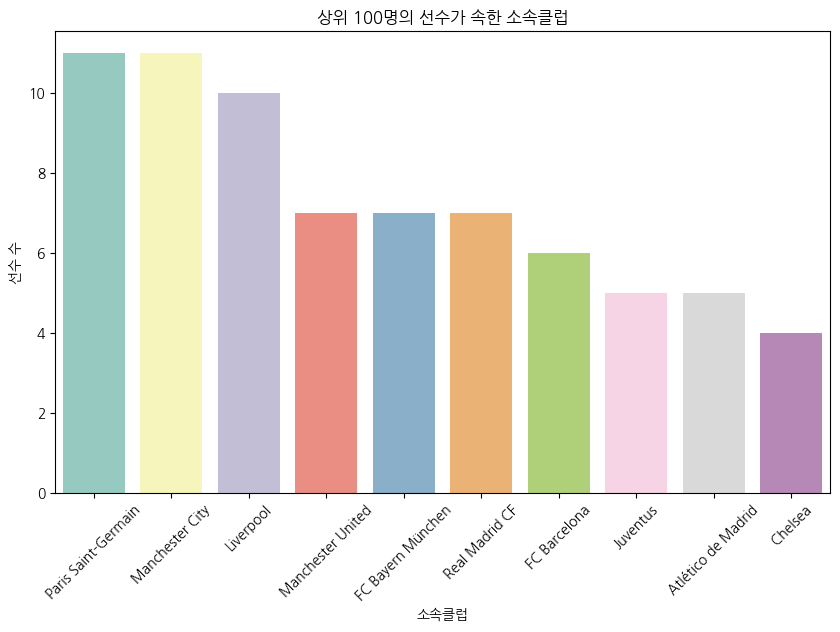

In [ ]:
best_club = new_data.sort_values(by='전반적수치', ascending=False).head(100)
best_club_count = best_club['소속클럽이름'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x='소속클럽이름', data=best_club, palette='Set3',order=best_club_count.head(10).index)

plt.title('상위 100명의 선수가 속한 소속클럽')
plt.xlabel('소속클럽')
plt.xticks(rotation=45)
plt.ylabel('선수 수')
plt.show()

## 구단주 입장에서 가성비 선수는?
### 선수 가치대비 임금이 적은선수(비로 계산)
= 선수가치/임금(주급)

In [ ]:
new_data['가성비'] = new_data['선수가치']/new_data['임금(주급)']
top_value_player = new_data.sort_values(by='가성비',ascending=False)
top_value_player.head(20)

,이름,포지션,전반적수치,잠재적수치,선수가치,임금(주급),나이,키,몸무게,소속클럽이름,소속국가,주요사용발,국제적 명성,기술동작능력,약발 숙련도,활동량 수준,주요포지션,주요포지션_한글,가성비
282,D. Livaković,GK,82,87,35000000.0,1000.0,26,187,79,Dinamo Zagreb,Croatia,Right,2,1,3,Medium/Medium,GK,골키퍼,35000.000000
506,V. Tsygankov,RM,80,86,33500000.0,1000.0,23,178,72,Dynamo Kyiv,Ukraine,Left,2,4,4,High/Medium,RM,오른쪽 미드필더,33500.000000
1450,A. Hložek,"ST, LM, RM",76,87,16000000.0,500.0,18,188,86,AC Sparta Praha,Czech Republic,Right,1,3,4,High/Medium,ST,스트라이커,32000.000000
1454,Tete,RM,76,86,17000000.0,800.0,21,175,73,Shakhtar Donetsk,Brazil,Left,1,4,3,High/Medium,RM,오른쪽 미드필더,21250.000000
1453,M. Solomon,"RM, LM, CAM",76,86,17000000.0,800.0,21,170,67,Shakhtar Donetsk,Israel,Right,1,3,4,High/Medium,RM,오른쪽 미드필더,21250.000000
1442,M. Shaparenko,"CM, CAM",76,84,17000000.0,900.0,22,177,67,Dynamo Kyiv,Ukraine,Right,1,3,3,Medium/Medium,CM,중앙 미드필더,18888.888889
1443,V. Mykolenko,LB,76,83,14500000.0,850.0,22,180,71,Dynamo Kyiv,Ukraine,Left,1,2,2,High/Medium,LB,왼쪽 풀백,17058.823529
851,O. Kolář,GK,78,82,15000000.0,900.0,26,193,81,SK Slavia Praha,Czech Republic,Right,1,1,3,Medium/Medium,GK,골키퍼,16666.666667
1134,L. Provod,"CM, LM, RM",77,82,16000000.0,1000.0,24,189,84,SK Slavia Praha,Czech Republic,Left,1,3,4,High/High,CM,중앙 미드필더,16000.000000
1092,M. Camara,"CM, CDM",77,82,16000000.0,1000.0,24,182,75,Olympiacos CFP,Guinea,Right,1,4,3,High/High,CM,중앙 미드필더,16000.000000


## 선수가 가장 많은 상위 10개국

/tmp/ipython-input-1165475592.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




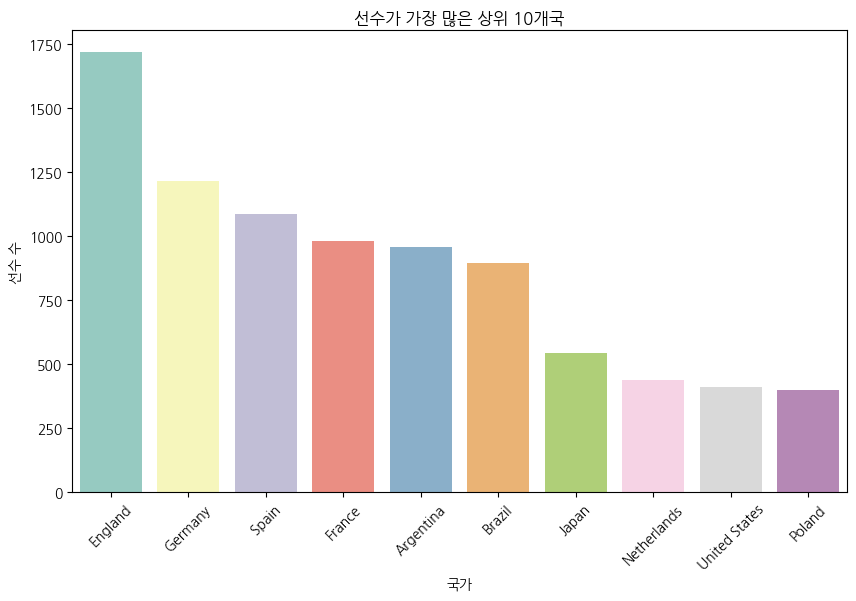

In [ ]:
top_nation = new_data['소속국가'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_nation.index, y=top_nation.values, palette='Set3')

plt.title('선수가 가장 많은 상위 10개국')
plt.xlabel('국가')
plt.xticks(rotation=45)
plt.ylabel('선수 수')
plt.show()

## 한국 선수들이 있는가?

In [ ]:
korea_players=new_data[new_data['소속국가']=='Korea Republic']
if not korea_players.empty:
    print(f"한국 선수들{len(korea_players)}명이 있습니다.")
else:
    print("한국 선수들이 없습니다.")

한국 선수들325명이 있습니다.


In [ ]:
korea_players.head(10)

,이름,포지션,전반적수치,잠재적수치,선수가치,임금(주급),나이,키,몸무게,소속클럽이름,소속국가,주요사용발,국제적 명성,기술동작능력,약발 숙련도,활동량 수준,주요포지션,주요포지션_한글,가성비
13,H. Son,"LM, CF, LW",89,89,104000000.0,220000.0,28,183,78,Tottenham Hotspur,Korea Republic,Right,4,4,5,High/High,LM,왼쪽 미드필더,472.727273
1286,Hwang Ui Jo,"ST, LM",76,76,7500000.0,29000.0,28,185,82,FC Girondins de Bordeaux,Korea Republic,Right,2,3,4,High/Medium,ST,스트라이커,258.620690
1677,Jo Hyeon Woo,GK,75,77,4700000.0,9000.0,29,189,75,Ulsan Hyundai FC,Korea Republic,Right,1,1,3,Medium/Medium,GK,골키퍼,522.222222
1752,Lee Jae Sung,"CM, CF, CAM",75,75,5500000.0,24000.0,28,180,70,1. FSV Mainz 05,Korea Republic,Left,2,3,4,High/High,CM,중앙 미드필더,229.166667
1794,Hwang Hee Chan,ST,75,78,7500000.0,58000.0,25,177,77,Wolverhampton Wanderers,Korea Republic,Right,1,3,4,High/Medium,ST,스트라이커,129.310345
2125,Jang Hyeon Soo,CB,74,74,3500000.0,31000.0,29,183,83,Al Hilal,Korea Republic,Right,1,2,3,Medium/High,CB,중앙 수비수,112.903226
2339,Kim Min Jae,CB,74,81,8000000.0,30000.0,24,190,81,Fenerbahçe SK,Korea Republic,Right,1,3,2,Medium/Medium,CB,중앙 수비수,266.666667
2385,Kangin Lee,"ST, CAM, RM",74,82,9500000.0,18000.0,20,173,68,RCD Mallorca,Korea Republic,Left,1,4,3,High/Low,ST,스트라이커,527.777778
2475,Ki Sung Yueng,"CM, CDM",73,73,2400000.0,6000.0,32,189,75,FC Seoul,Korea Republic,Right,2,3,4,Medium/Medium,CM,중앙 미드필더,400.000000
2579,Yoon Bit Garam,"CM, LM",73,73,2500000.0,10000.0,31,178,75,Ulsan Hyundai FC,Korea Republic,Right,2,3,4,Medium/Medium,CM,중앙 미드필더,250.000000


In [ ]:
country_counts = new_data['소속국가'].value_counts().reset_index()
country_counts.columns = ['소속국가', '선수수']

# Choropleth 맵 그리기
fig = px.choropleth(
    data_frame=country_counts,
    locations='소속국가',
    locationmode='country names',
    color='선수수',
    color_continuous_scale='Reds',
    title='나라별 선수 수 분포'
)

# 레이아웃 조정
fig.update_layout(
    title_x=0.5,
    width=1000,
    height=800
)


## 드림팀을 구성한다면?

In [ ]:
best_players=new_data.sort_values('전반적수치',ascending=False).groupby('주요포지션_한글').first().reset_index()
best_team = best_players[['이름','주요포지션_한글','전반적수치','소속클럽이름','소속국가']]

best_team.head(20)

,이름,주요포지션_한글,전반적수치,소속클럽이름,소속국가
0,J. Oblak,골키퍼,91,Atlético de Madrid,Slovenia
1,Bruno Fernandes,공격형 미드필더,88,Manchester United,Portugal
2,N. Kanté,수비형 미드필더,90,Chelsea,France
3,R. Lewandowski,스트라이커,92,FC Bayern München,Poland
4,J. Sancho,오른쪽 미드필더,87,Manchester United,England
5,H. Hateboer,오른쪽 윙백,81,Atalanta,Netherlands
6,L. Messi,오른쪽 윙어,93,Paris Saint-Germain,Argentina
7,T. Alexander-Arnold,오른쪽 풀백,87,Liverpool,England
8,H. Son,왼쪽 미드필더,89,Tottenham Hotspur,Korea Republic
9,R. Gosens,왼쪽 윙백,83,Atalanta,Germany


## 구단주 입장에서 유망주 찾기
### 성장가능성 = 잠재적 수치 - 전반적 수치

In [ ]:
new_data['성장가능성'] = new_data['잠재적수치'] - new_data['전반적수치']
test_player = new_data.sort_values('성장가능성',ascending=False).head(10)
test_player

,이름,포지션,전반적수치,잠재적수치,선수가치,임금(주급),나이,키,몸무게,소속클럽이름,소속국가,주요사용발,국제적 명성,기술동작능력,약발 숙련도,활동량 수준,주요포지션,주요포지션_한글,가성비,성장가능성
18936,C. Brady,GK,51,77,220000.0,500.0,17,191,77,Chicago Fire Football Club,United States,Right,1,1,2,Medium/Medium,GK,골키퍼,440.000000,26
18227,K. Urbański,CAM,54,79,350000.0,550.0,16,178,58,Bologna,Poland,Right,1,3,3,Medium/Medium,CAM,공격형 미드필더,636.363636,25
18828,A. Denholm,RW,52,77,250000.0,500.0,17,175,68,Heart of Midlothian,Scotland,Right,1,2,3,High/Medium,RW,오른쪽 윙어,500.000000,25
16326,A. Hackford,ST,59,84,700000.0,950.0,17,177,68,Sheffield United,England,Right,1,2,3,Medium/Medium,ST,스트라이커,736.842105,25
18510,B. Chrisene,"LB, LWB",53,78,275000.0,500.0,17,181,68,Aston Villa,England,Left,1,3,3,High/Medium,LB,왼쪽 풀백,550.000000,25
19146,O. Cisneros,"CAM, CM, ST",49,74,150000.0,500.0,17,165,63,Sporting Kansas City,United States,Right,1,3,4,High/Medium,CAM,공격형 미드필더,300.000000,25
19183,F. Emmings,GK,48,73,130000.0,500.0,17,195,95,Minnesota United FC,United States,Left,1,1,2,Medium/Medium,GK,골키퍼,260.000000,25
17414,A. Devine,"CM, CDM",57,82,500000.0,1000.0,16,180,70,Tottenham Hotspur,England,Right,1,2,3,Medium/Medium,CM,중앙 미드필더,500.000000,25
18943,R. O'Kane,RW,51,75,180000.0,500.0,17,168,59,Dundalk FC,Republic of Ireland,Right,1,2,2,Medium/Medium,RW,오른쪽 윙어,360.000000,24
17647,B. Kalkan,"LM, RM",56,80,450000.0,850.0,18,170,65,Kasimpaşa SK,North Macedonia,Right,1,2,4,Medium/Medium,LM,왼쪽 미드필더,529.411765,24


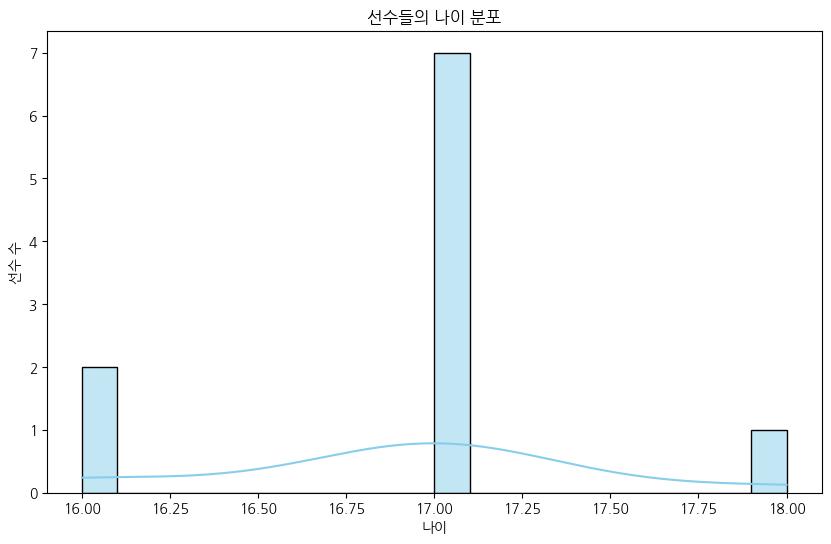

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(test_player['나이'], bins=20, kde=True, color='skyblue')
plt.title('선수들의 나이 분포')
plt.xlabel('나이')
plt.ylabel('선수 수')
plt.show()